In [ ]:
import numpy as np

def roc_curve_calculation(y_true, prediction, thresholds):

    fpr = []
    tpr = []
    acc = []

    for threshold in thresholds:

        y_pred = np.where(prediction <= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
        

    return fpr, tpr

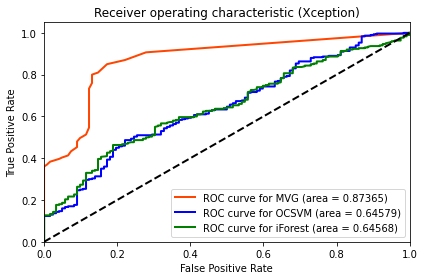

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import cv2

# a= np.arange(-5, 10,0.0001)
# acc = []
# ktf = []
# rtf = []
# fpr_list = []
# tpr_list = []

# fpr, tpr = roc_curve_calculation(p.values.flatten(), d.values.flatten(), a)
import pickle
infile = open('mvg_Xception_tpr','rb')
tpr_mvg = pickle.load(infile)
infile.close()

infile = open('mvg_Xception_fpr','rb')
fpr_mvg = pickle.load(infile)
infile.close()


infile = open('if_Xception_tpr','rb')
tpr_if = pickle.load(infile)
infile.close()

infile = open('if_Xception_fpr','rb')
fpr_if = pickle.load(infile)
infile.close()

infile = open('svm_Xception_tpr','rb')
tpr_svm = pickle.load(infile)
infile.close()

infile = open('svm_Xception_fpr','rb')
fpr_svm = pickle.load(infile)
infile.close()


roc_auc_mvg = auc(fpr_mvg, tpr_mvg)
roc_auc_if = auc(fpr_if, tpr_if)
roc_auc_svm = auc(fpr_svm, tpr_svm)

lw = 2

plt.plot(fpr_mvg,tpr_mvg,color='orangered', 
             lw=lw, label='ROC curve for MVG (area = %0.5f)' % roc_auc_mvg)
plt.plot(fpr_svm,tpr_svm,color='blue', 
             lw=lw, label='ROC curve for OCSVM (area = %0.5f)' % roc_auc_svm)
plt.plot(fpr_if,tpr_if,color='green', 
             lw=lw, label='ROC curve for iForest (area = %0.5f)' % roc_auc_if)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Xception)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("AUC_Xception.svg", dpi=2160)
plt.show()
